# **Student Performance Prediction** using **Linear Regression**

Notebook by ***Shyam Sundhar G***

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
import kagglehub

path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1


In [38]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1/Student_Performance.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [40]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [41]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [42]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


<Axes: >

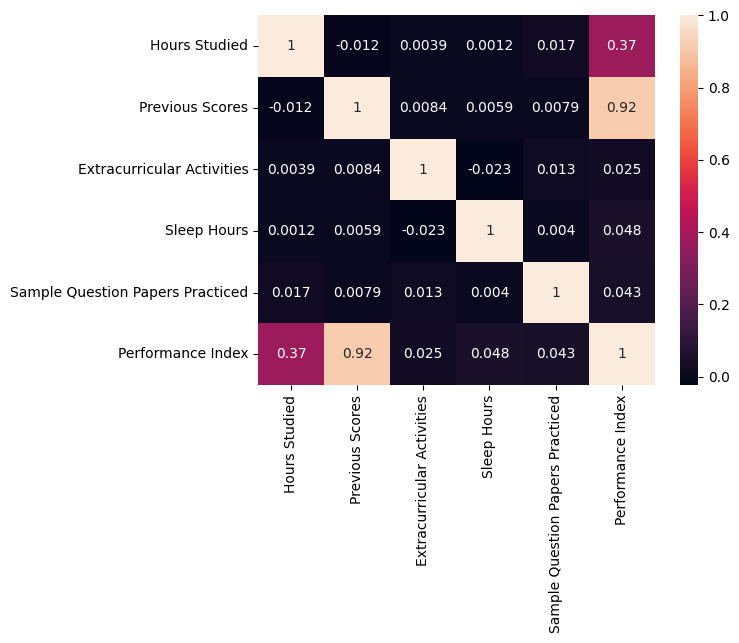

In [44]:
sns.heatmap(df.corr(), annot=True)

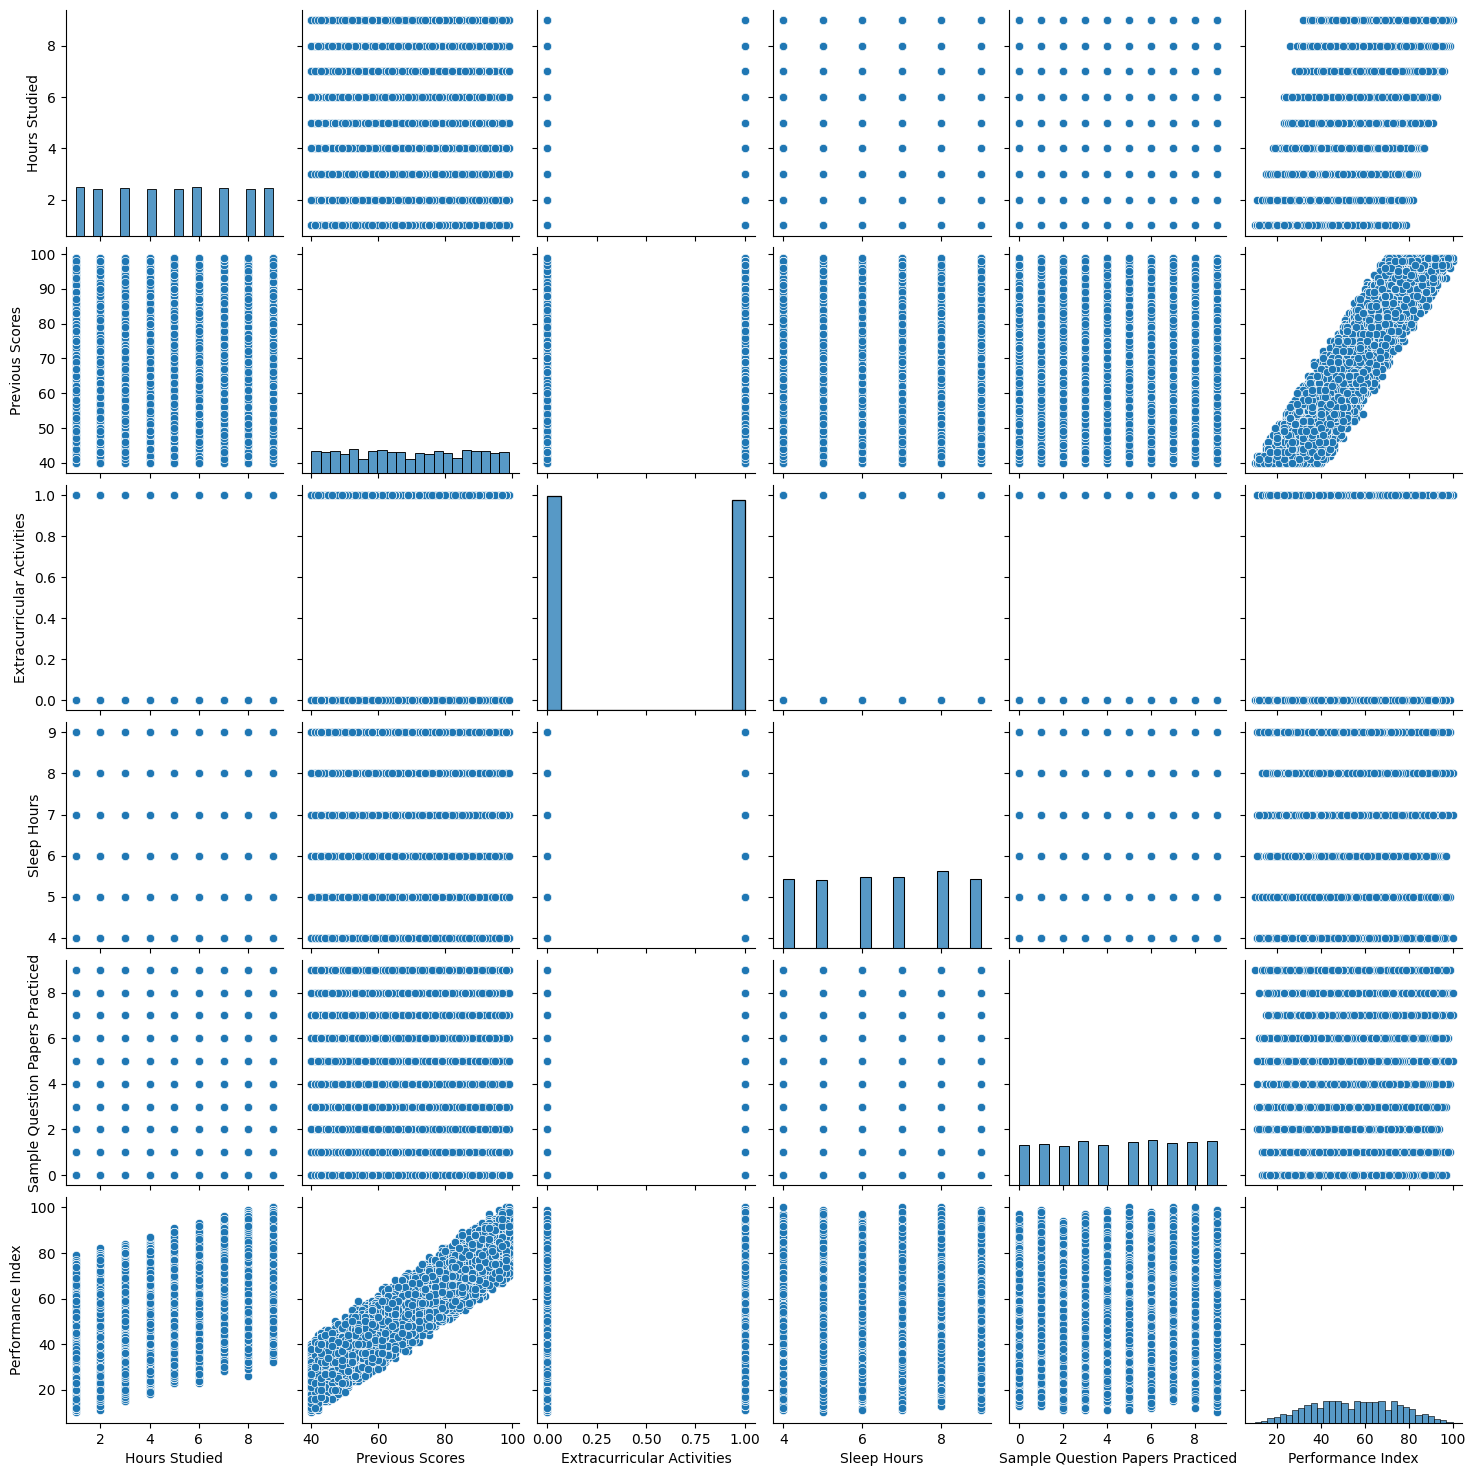

In [45]:
sns.pairplot(df)

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

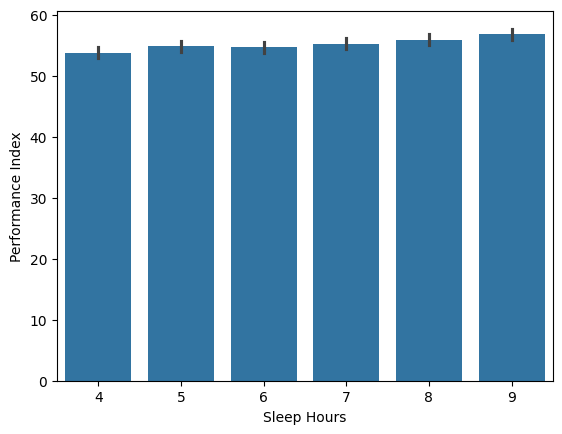

In [46]:
sns.barplot(x='Sleep Hours', y='Performance Index', data=df)

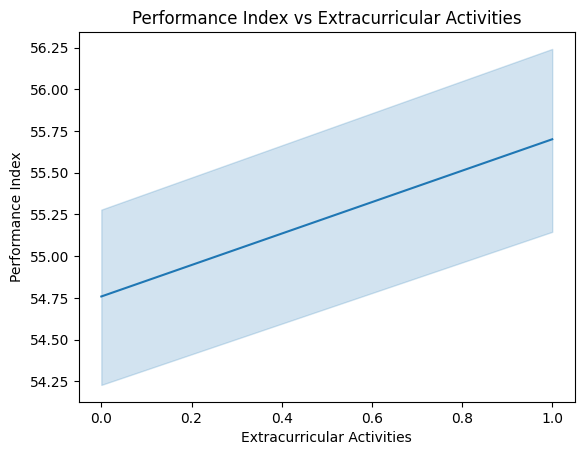

In [47]:
sns.lineplot(x='Extracurricular Activities', y='Performance Index', data=df)
plt.title('Performance Index vs Extracurricular Activities')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Performance Index')
plt.show()

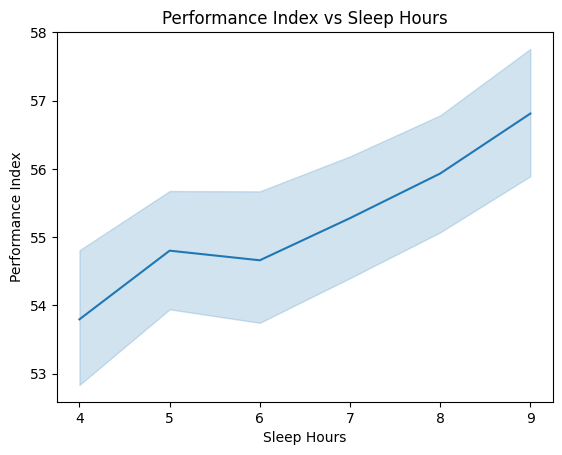

In [48]:
sns.lineplot(x='Sleep Hours', y='Performance Index', data=df)
plt.title('Performance Index vs Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.show()

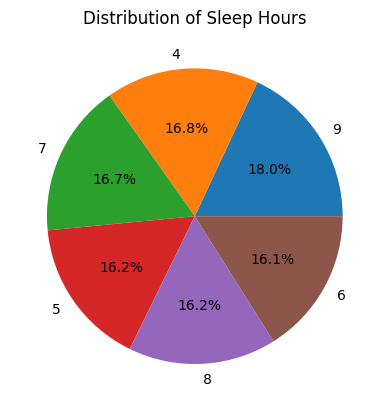

In [49]:
plt.pie(df['Sleep Hours'].value_counts(), labels=df['Sleep Hours'].unique(), autopct='%1.1f%%')
plt.title('Distribution of Sleep Hours')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('Performance Index', axis=1)
Y = df['Performance Index']
print(X.shape,Y.shape)

(10000, 5) (10000,)


In [51]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=0)
print(Xtrain.shape,Ytrain.shape)
print(Xtest.shape,Ytest.shape)

(8000, 5) (8000,)
(2000, 5) (2000,)


In [52]:
model = LinearRegression()
model.fit(Xtrain,Ytrain)

LinearRegression()

In [53]:
ypred=model.predict(Xtest)
ypred

array([50.45128503, 53.09379171, 78.24502652, ..., 64.56863194,
       25.89718776, 18.82598463])

In [54]:
mse = mean_squared_error(Ytest, ypred)
r2 = r2_score(Ytest, ypred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4.105609215835835
R-squared: 0.9880686410711422


In [55]:
model.predict([[7,99,1,9,1]])

array([91.90053241])

In [64]:
joblib.dump(model, 'model.pkl')

print("Model saved to 'model.pkl'")

Model saved to 'model.pkl'


In [67]:
%%writefile app.py
import streamlit as st
import joblib

st.title('🎓 Student Performance Prediction')
st.header('📊 Predict Academic Performance')
st.markdown("Enter the student's details below to predict their academic performance:")

with st.spinner("Loading model..."):
    model = joblib.load('model.pkl')

a = st.slider('🕒 Hours Studied Per Day', 0, 12, step=1, help="Number of hours the student dedicates to studying daily.")
b = st.slider('💤 Hours Slept Per Day', 0, 12, step=1, help="Number of hours the student sleeps daily.")
c = st.number_input('📈 Previous Academic Score (%)', min_value=0, max_value=100, step=1, help="The student's most recent score in percentage.")
lists = ["Yes", "No"]
d = st.radio('🏅 Interested in Extra-Curricular Activities?', lists, help="Is the student actively involved in extra-curricular activities?")
dd = {"Yes": 1, "No": 0}
d = dd[d]
e = st.slider('📄 Number of Sample Question Papers Practiced', 0, 20, step=1, help="How many sample question papers has the student practiced?")

if st.button("🔮 Predict the Performance"):
    with st.spinner("Predicting performance..."):
        x = model.predict([[a, b, c, d, e]])
    st.success(f"🌟 Predicted Academic Performance: **{x[0]:.2f}%**")
    if x[0] > 75:
        st.balloons()

Overwriting app.py


In [58]:
!pip install streamlit pyngrok

In [59]:
!ngrok config add-authtoken YOUR_AUTH_TOKEN

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [60]:
from pyngrok import ngrok

# Terminate any running tunnels
ngrok.kill()

# Start a new ngrok tunnel on HTTP protocol
public_url = ngrok.connect(addr="8501", proto="http")
print(f"Access your Streamlit app here: {public_url}")


Access your Streamlit app here: NgrokTunnel: "https://4d22-34-125-63-13.ngrok-free.app" -> "http://localhost:8501"


In [61]:
!streamlit run app.py &>/content/logs.txt &